## ProteinVis basics, creating a VisualProtein object
The first thing you need to do when plotting a protein sequence is to create a VisualProtein object. Much like a SHEPHARD Protein object can contain Tracks and Domains, a VisualProtein object can hold zero or more LinearTracks, DomainTracks, GridTracks, and SequenceTracks (SiteTracks to come, I suppose). 

* **LinearTracks** enable you to plot a continuous number along the length of the sequence. This can be displayed as either a line plot or a bar plot, depending on what is wanted.

* **DomainTracks** enable you to plot zero or more Domains along the length of the sequence. Domains within a single DomainTrack cannot overlap, but of course, you could have multiple DomainTracks as needed. 

* **GridTracks** enable you to plot a per-residue heatmap to plot a matrix of values with distinct colours, basically letting you compress information that might otherwise be shown as a LinearTrack into a more space-efficient format.

* **SequenceTracks** enable you to actually see the sequence! Sometimes we want to SEE the specific amino acids! This lets you plot the sequence alongside the tracks.

The logic of generating a VisualProtein plot is as follows:

1. Initialize your VisualProtein object
2. Add the Tracks named above, in order, where for Domain Tracks and Sequence Tracks we can add individual Domains to the track (shown below)
3. Finally, we pass the "loaded" VisualProtein object to the stateless `plot_protein_structure()` function, which has a bunch of controls for formatting the look-n-feel of the overall plot.

The code below walks through an example of using all the features in one figure. It's worth noting that you can also have two (or more) VisualProteins plotted by the `plot_protein_structure()` function; just pass a list of VisualProtein objects.

As of now, this is a beta version, since we'll see what features we want/hate/need and add/remove as needed. Feel free to raise feature requests on GitHub.


In [1]:
from sparrow.visualize import proteinvis
from sparrow import Protein
import metapredict as meta

In [2]:
# define the protein sequence (Med15)
seq = 'MSAAPVQDKDTLSNAERAKNVNGLLQVLMDINTLNGGSSDTADKIRIHAKNFEAALFAKSSSKKEYMDSMNEKVAVMRNTYNTRKNAVTAAAANNNIKPVEQHHINNLKNSGNSANNMNVNMNLNPQMFLNQQAQARQQVAQQLRNQQQQQQQQQQQQRRQLTPQQQQLVNQMKVAPIPKQLLQRIPNIPPNINTWQQVTALAQQKLLTPQDMEAAKEVYKIHQQLLFKARLQQQQAQAQAQANNNNNGLPQNGNINNNINIPQQQQMQPPNSSANNNPLQQQSSQNTVPNVLNQINQIFSPEEQRSLLQEAIETCKNFEKTQLGSTMTEPVKQSFIRKYINQKALRKIQALRDVKNNNNANNNGSNLQRAQNVPMNIIQQQQQQNTNNNDTIATSATPNAAAFSQQQNASSKLYQMQQQQQAQAQAQAQAQAQAQAQAQAQAAQAAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAHAQHQPSQQPQQAQQQPNPLHGLTPTAKDVEVIKQLSLDASKTNLRLTDVTNSLSNEEKEKIKMKLKQGQKLFVQVSNFAPQVYIITKNENFLKEVFQLRIFVKEILEKCAEGIFVVKLDTVDRLIIKYQKYWESMRIQILRRQAILRQQQQMANNNGNPGTTSTGNNNNIATQQNMQQSLQQMQHLQQLKMQQQQQQQQQQQQQQQQQQQQQQQHIYPSSTPGVANYSAMANAPGNNIPYMNHKNTSSMDFLNSMENTPKVPVSAAATPSLNKTINGKVNGRTKSNTIPVTSIPSTNKKLSISNAASQQPTPRSASNTAKSTPNTNPSPLKTQTKNGTPNPNNMKTVQSPMGAQPSYNSAIIENAFRKEELLLKDLEIRKLEISSRFKHRQEIFKDSPMDLFMSTLGDCLGIKDEEMLTSCTIPKAVVDHINGSGKRKPTKAAQRARDQDSIDISIKDNKLVMKSKFNKSNRSYSIALSNVAAIFKGIGGNFKDLSTLVHSSSPSTSSNMDVGNPRKRKASVLEISPQDSIASVLSPDSNIMSDSKKIKVDSPDDPFMTKSGATTSEKQEVTNEAPFLTSGTSSEQFNVWDWNNWTSAT'

In [3]:
# predict disordered domains
disorder = meta.predict_disorder(seq,return_domains=True)

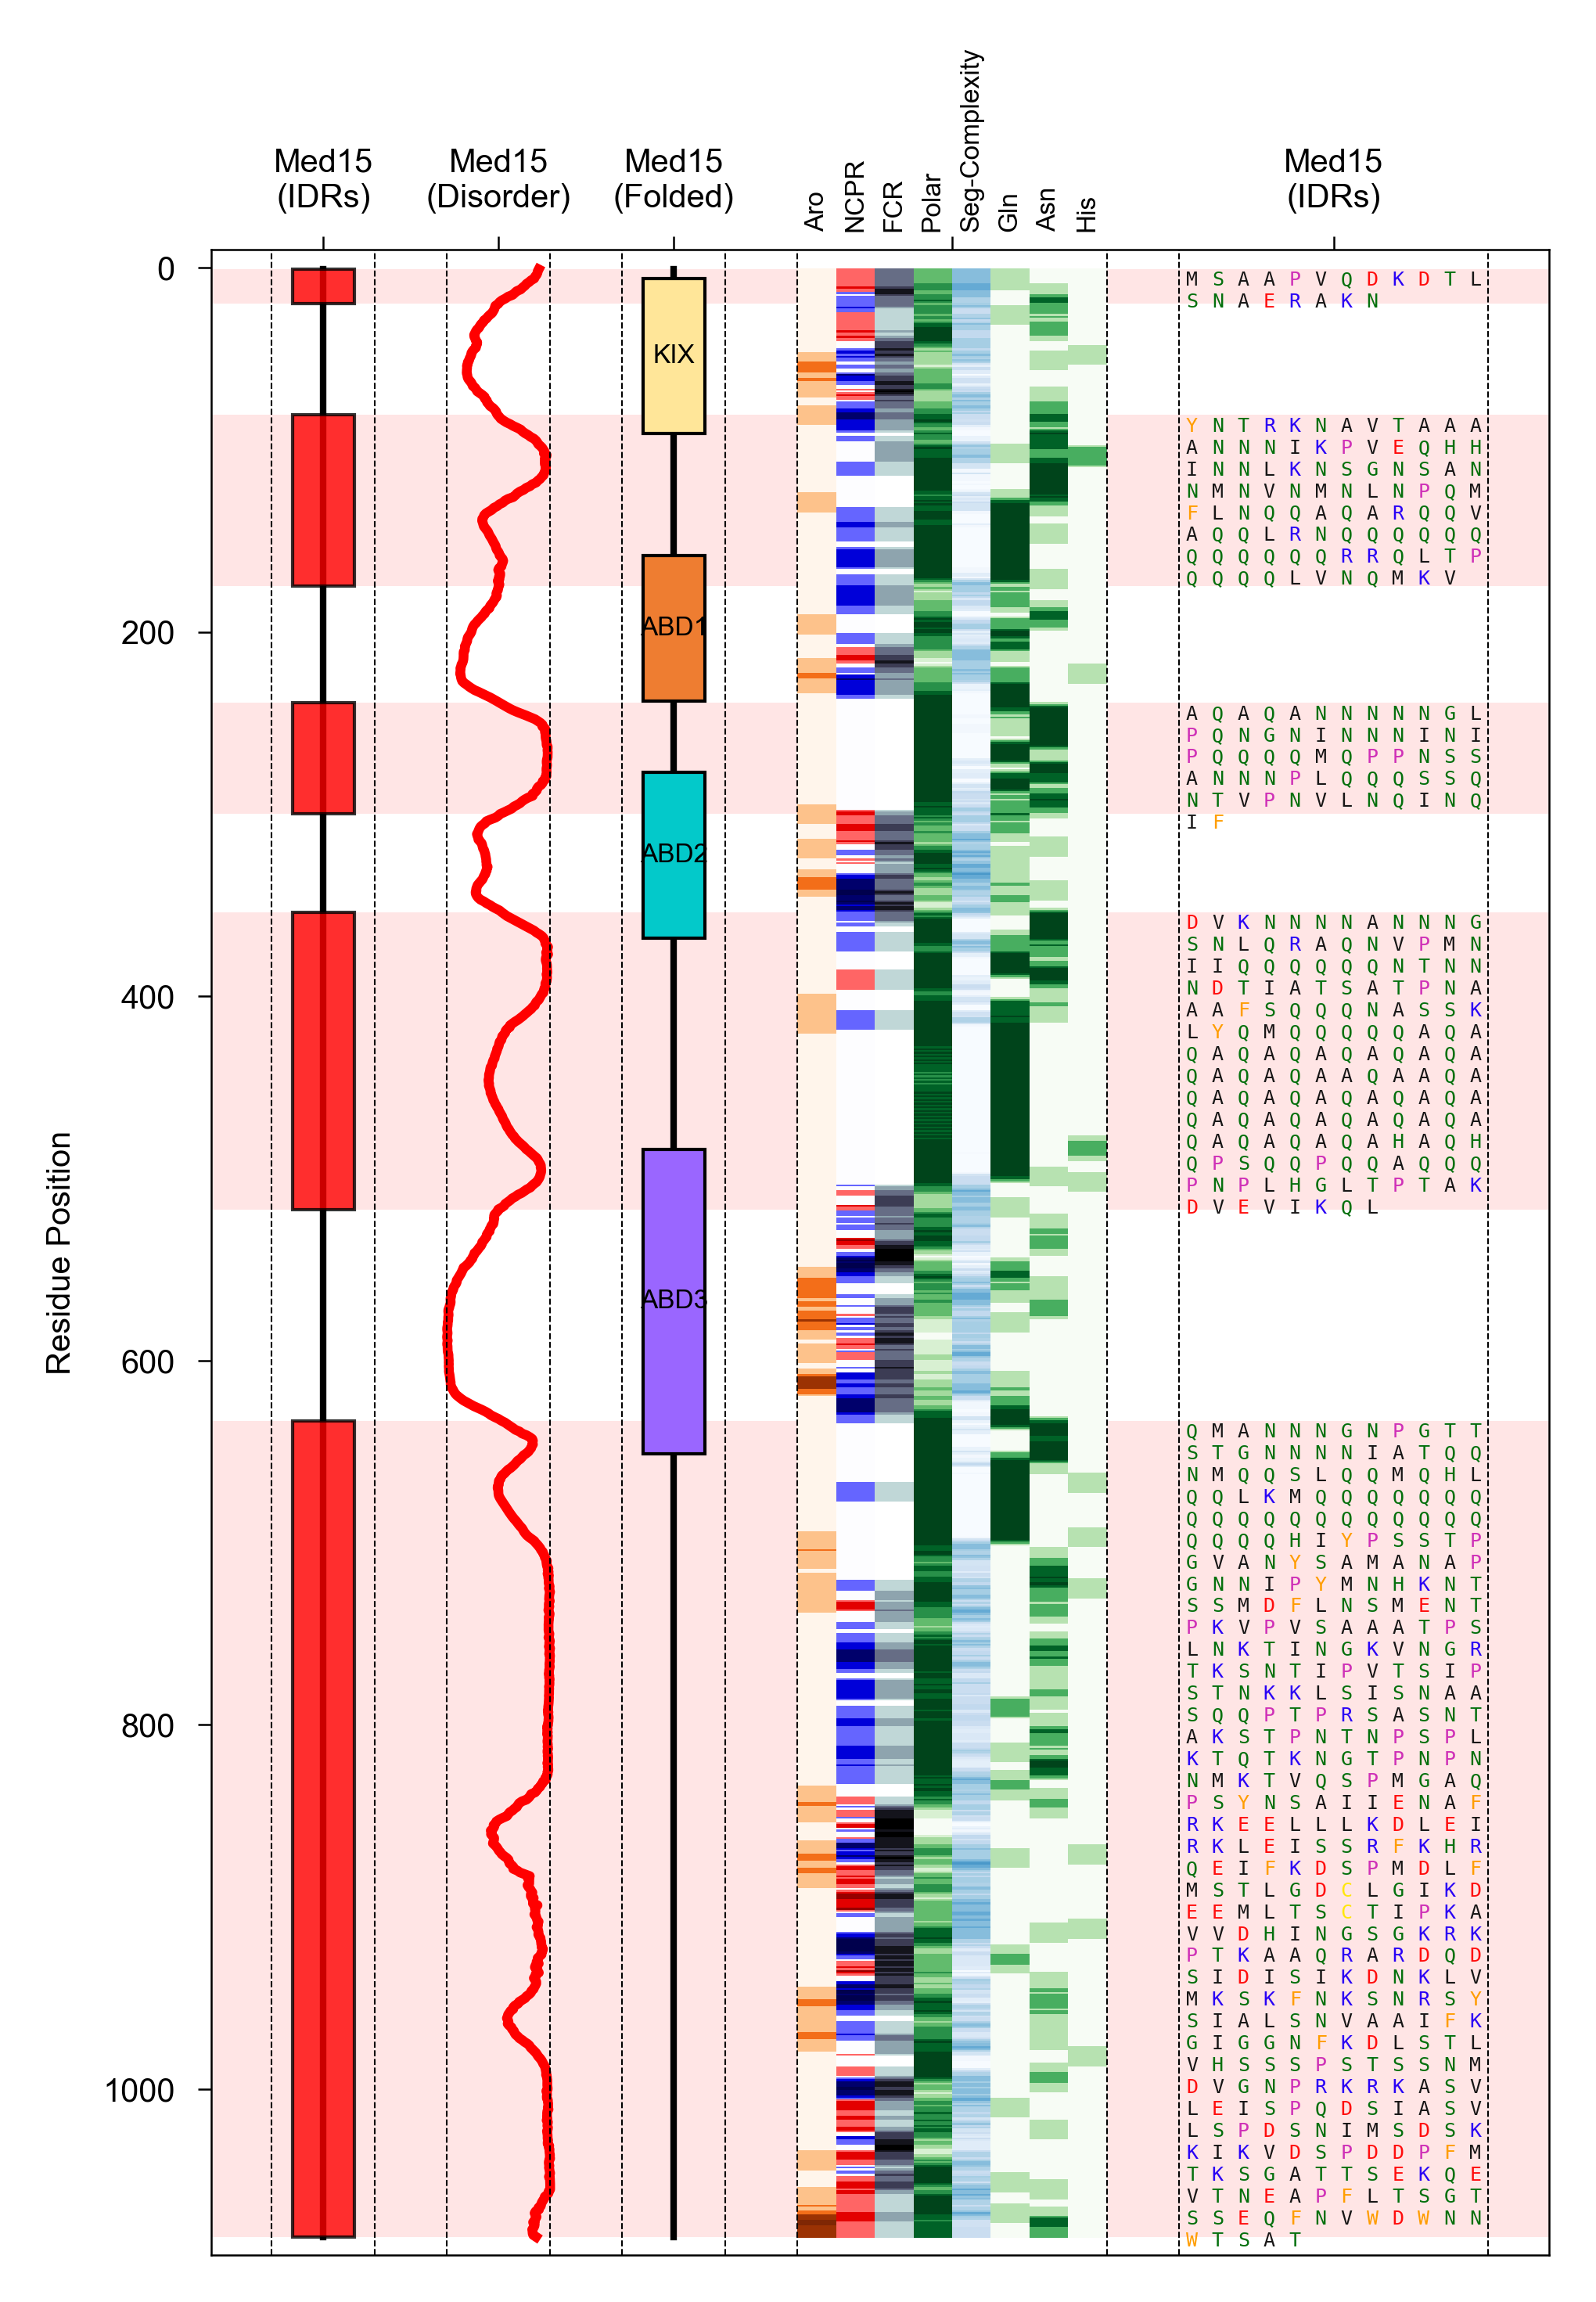

In [4]:
## Step 1
# create a new VisualProtein object (note you can also just path a 
# length of you don't have the sequence, but you must do one 
p1 = proteinvis.VisualProtein("Med15", sequence=seq)

# predict IDRs (because, obviously, we want to know where the IDRs are)
disorder = meta.predict_disorder(seq, return_domains=True)


## Step 2 - add a DomainTrack
# The first thing we're going to do is define a DomainTrack to hold the contigous IDRs
# Initial this track is empty (we ONLY give it a name)
IDR_domains = proteinvis.DomainTrack("IDRs")

# then for each IDR we predicted using metapredict, we add that
# domain to the DomainTrack we just defined
for i in disorder.disordered_domain_boundaries:

    # note thet metapredict use 0-indexing but proteinvis uses 1 indexing. Note also we
    # include a horizontal_band_color which means we draw a band across the whole plot to "guide
    # the eye" as how IDRs fall elsewhere. If this is not included, no such band is drawn.
    IDR_domains.add_domain(i[0]+1, 
                           i[1], 
                           color="red", 
                           width=0.6, 
                           horizontal_band_color="red", 
                           horizontal_band_alpha=0.1)

# one ce we've added all the domains we want to, we add the IDR_domains DomainTrack to the VisualProtein object as the 
# first track.
# add domain tracks to the VisualProtein object
p1.add_track(IDR_domains)


## Step 3 - Add a LinearTrack
# To complement our congigous IDRs, we also draw the continous disorder profile as a LinearTrack. Here we're defining and 
# then adding the LinearTrack in one line but of course these could be done separately
p1.add_track(proteinvis.LinearTrack("Disorder", disorder.disorder, color="r", track_width=1.0, plot_type='line'))


## Step 4 - Add more domains (this time folded domains)
folded_domains = proteinvis.DomainTrack("Folded")

## add folded domains to this track; domain boundaries and colors defined here as 
# described in Rachel Klevit's 2021 Nat Comms paper.
# add Kix domain
folded_domains.add_domain(6, 91, color='#ffe699', label='KIX', label_fontsize=4, alpha=1)

# Add ABD1
folded_domains.add_domain(158, 238, color='#ee7d31', label='ABD1', label_fontsize=4, alpha=1)

# Add ABD2
folded_domains.add_domain(277, 368, color='#03c9ca', label='ABD2', label_fontsize=4, alpha=1)

# Add ABD3
folded_domains.add_domain(484, 651, color='#9a66ff', label='ABD3',  label_fontsize=4, alpha=1)

# and again, add the folded_domains track
p1.add_track(folded_domains)


## Step 5 - Add a GridTrack (heatmap style track)
# Right now we do this by initializing a matrix of the right size and then populating the columns
# with specific data. This will probably change in the future but we wanted to figure out the logistics
# and mechanics before adding syntactic sugar...
grid_data = np.zeros((len(seq), 8)) 

# for each column and numerical values (here from the sparrow Protein object)
grid_data[:,0] = Protein(seq).linear_sequence_profile('aromatic',window_size=11)
grid_data[:,1] = Protein(seq).linear_sequence_profile('NCPR',window_size=11)
grid_data[:,2] = Protein(seq).linear_sequence_profile('FCR',window_size=11)
grid_data[:,3] = Protein(seq).linear_sequence_profile('polar',window_size=11)
grid_data[:,4] = Protein(seq).linear_sequence_profile('seg-complexity',window_size=11)
grid_data[:,5] = Protein(seq).linear_composition_profile('Q',window_size=11)
grid_data[:,6] = Protein(seq).linear_composition_profile('N',window_size=11)
grid_data[:,7] = Protein(seq).linear_composition_profile('H',window_size=11)


# Finally we use this matrix as input for the GridTrack constructor, which for each column takes:
# 1. A colormap to use
# 2. The name of the column
# 3. The min/max to scale the colorscale by
# build the GridTrack
gt = proteinvis.GridTrack(
    name="composition", 
    data=grid_data, 
    colormaps=['Oranges', 'seismic_r', 'bone_r', 'Greens', 'Blues','Greens','Greens','Greens'], 
    column_names=['Aro', 'NCPR', 'FCR', 'Polar', 'Seg-Complexity','Gln','Asn','His'],
    v_limits=[(0, 0.3), (-0.3, 0.3), (0, 0.5), (0, 0.5), (0.5, 1), (0, 0.3), (0, 0.3), (0, 0.3)],
    track_width=3.0,
    column_label_fontsize=4,
    column_label_y_offset=-20)

# finally we add that GridTrack object 
p1.add_track(gt)


## Step 6 - Add a SequenceTrack (amino acid sequence)
# Add sequence tracks to see actual amino acids sequnce; not we define the 
# Look-n-feel and the FULL LENGTH sequence in the SequenceTrack constructor
st = proteinvis.SequenceTrack(name="IDRs",
                   sequence=seq,                   
                   fontsize=3,
                   chars_per_block=12,
                   track_width=3.0,
                   blocks_per_row=1)                 

# and then for each IDR...
for X in disorder.disordered_domain_boundaries:

    # ...add a SequenceDomainto the SequenceTrack
    st.add_domain(start=X[0]+1, end=X[1])

# add the SequenceTrack to the VisualProtein
p1.add_track(st)


## Step 7 - Finally we actually plot the whole thing
(f,x) = proteinvis.plot_protein_structure(p1, 
                                          dpi=600,
                                          spacing=0.7, 
                                          show_grid=False, 
                                          figure_height=5,
                                          figure_width=3.5,
                                          width_scaling_factor=3.7,
                                          tick_label_size=5, 
                                          spine_width=0.3, 
                                          show_guidelines=True)

f.savefig('med15_labelled.pdf')